**Step 1: Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

**Step 2: Load Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Check Missing Values**

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Drop Unnamed: 32**

In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step 3: Exploratory Data Analysis (EDA)**

**Diagnosis distribution**

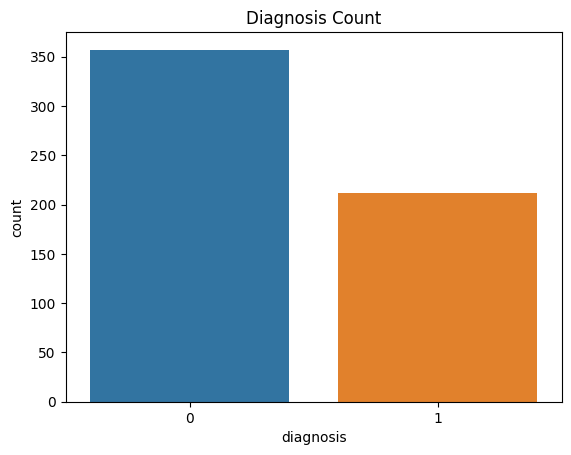

In [6]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Count')
plt.show()

**Correlation heatmap**

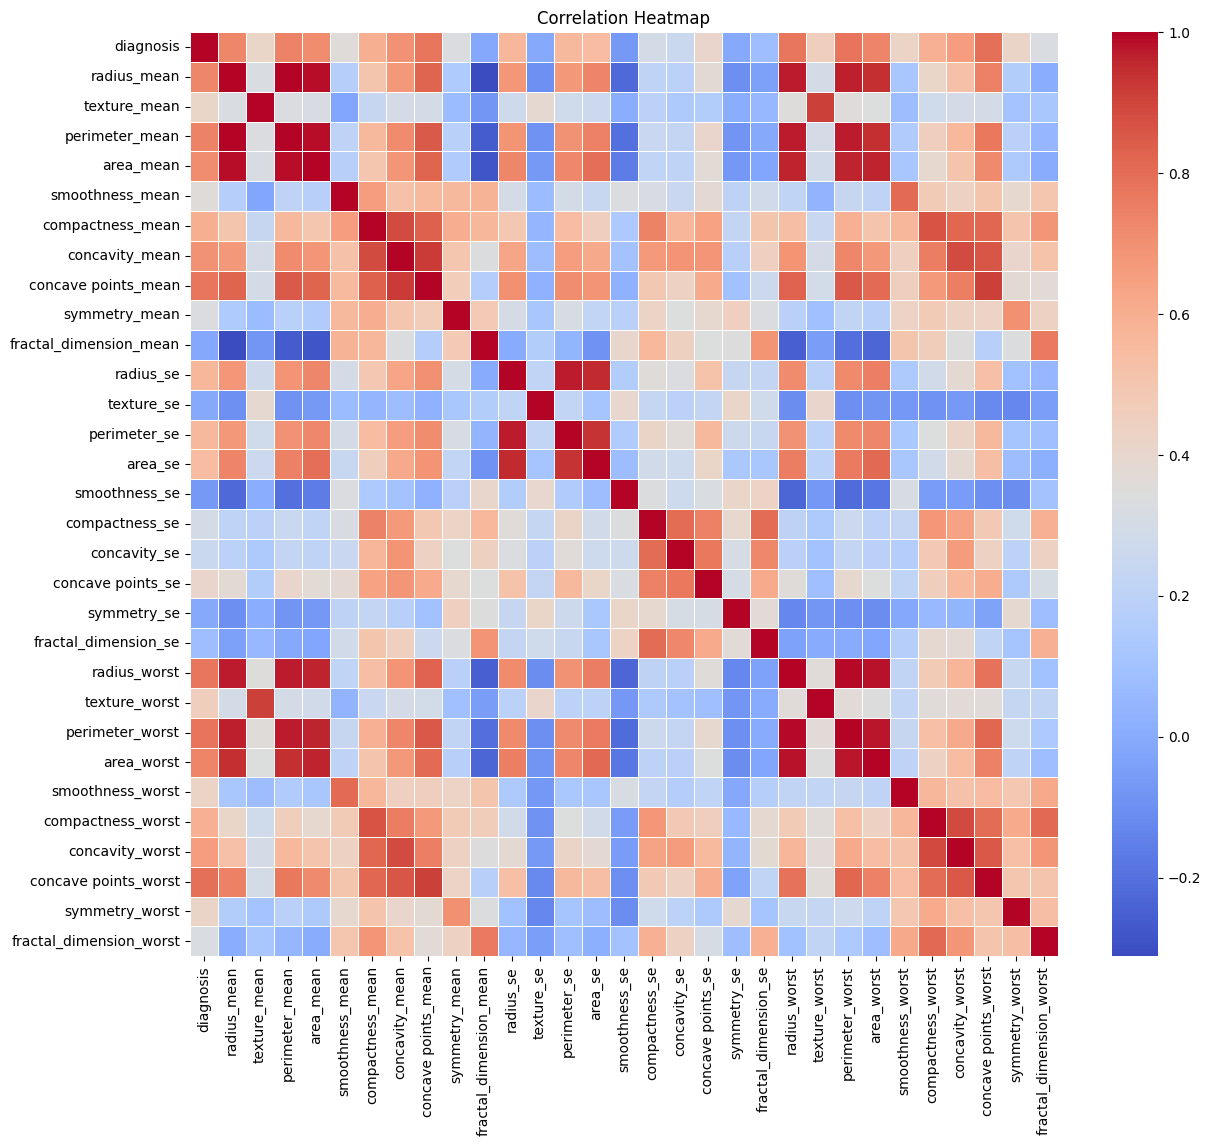

In [7]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Boxplots for outliers**

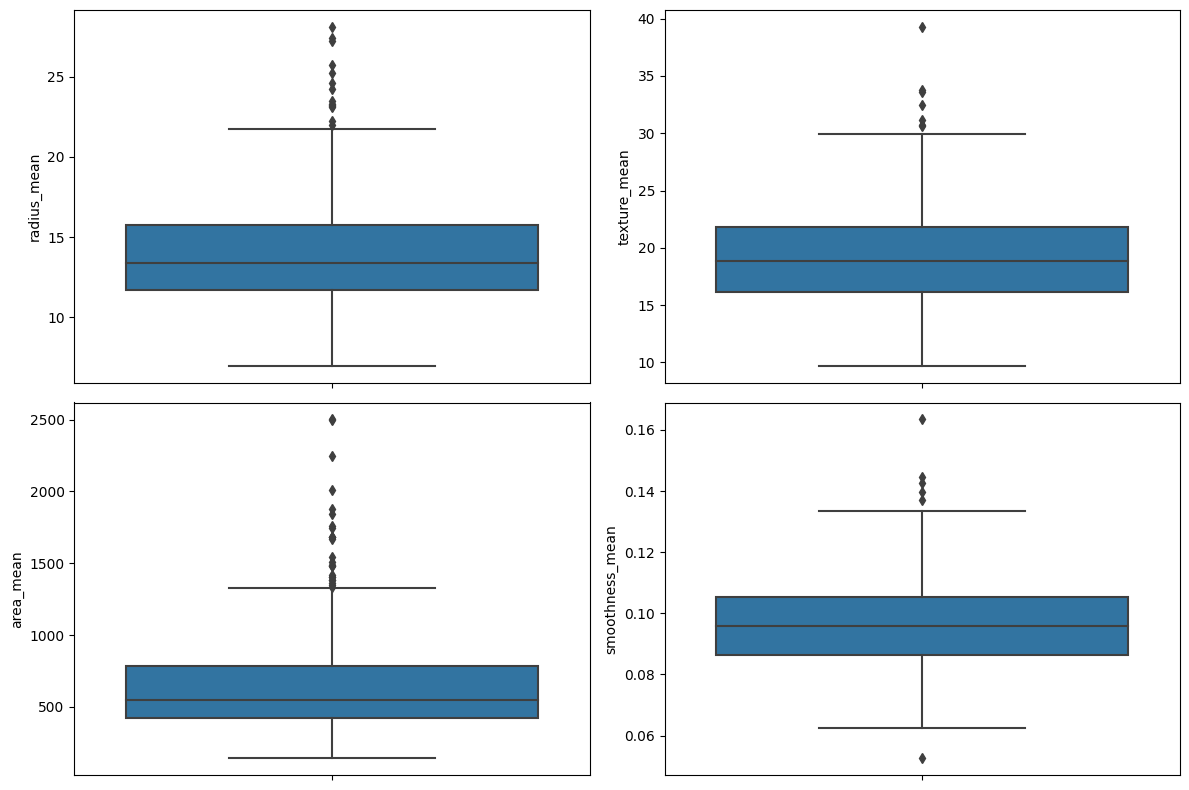

In [8]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()

**Remove Outliners**

In [9]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers(df, features)

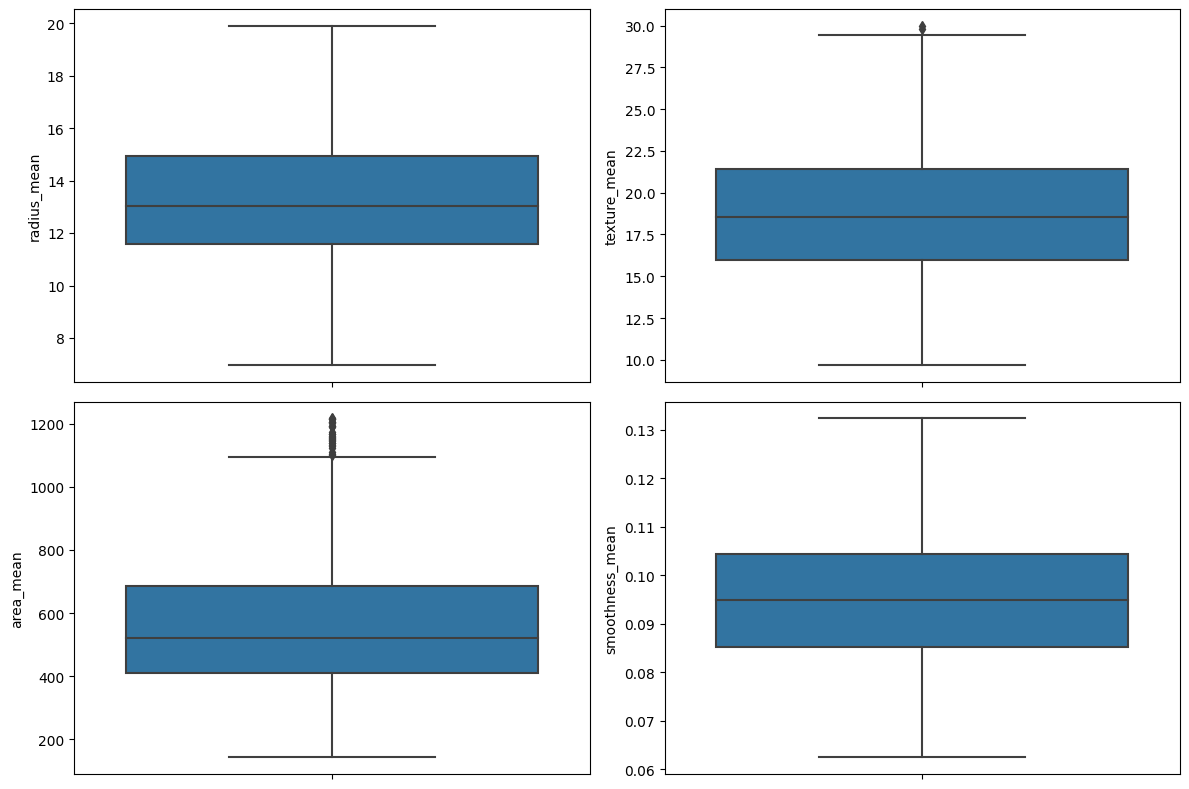

In [10]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()

**Step 4: Preprocessing and Train-Test Split**

In [11]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

numeric_features = X.columns.tolist()
categorical_features = []

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 5: Define Models**

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

**Step 6: Train Untuned Models and Evaluation**

In [15]:
untuned_scores = {}
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("pre", preprocessor),
        ("clf", model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    acc = accuracy_score(y_test, preds)
    untuned_scores[name] = acc
    results[name] = {'model': pipeline, 'accuracy': acc}  # Use pipeline here, not undefined 'pipe'

acc_df = pd.DataFrame({k: v['accuracy'] for k, v in results.items()}, index=['Untuned_Accuracy']).T
best_untuned_model_name = acc_df['Untuned_Accuracy'].idxmax()
best_untuned_model = results[best_untuned_model_name]['model']
print(acc_df)
print("Best Untuned Model:", best_untuned_model_name)

                     Untuned_Accuracy
Logistic Regression          0.970588
KNN                          0.960784
SVM                          0.970588
Decision Tree                0.931373
Random Forest                0.960784
MLP                          0.960784
XGBoost                      0.950980
Best Untuned Model: Logistic Regression


**Step 7: Train tuned Models and Evaluation**

In [18]:
params = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "KNN": {'clf__n_neighbors': [3, 5, 7]},
    "SVM": {'clf__C': [0.1, 1], 'clf__kernel': ['linear', 'rbf']},
    "Decision Tree": {'clf__max_depth': [3, 5, None]},
    "Random Forest": {'clf__n_estimators': [50, 100], 'clf__max_depth': [None, 5]},
    "MLP": {'clf__hidden_layer_sizes': [(50,), (100,)], 'clf__activation': ['relu', 'tanh']},
    "XGBoost": {'clf__n_estimators': [50, 100], 'clf__max_depth': [3, 5]}
}

tuned_scores = {}
tuned_results = {}

for name in params:
    pipeline = Pipeline([
        ("pre", preprocessor),
        ("clf", (models[name]))
    ])
    grid = GridSearchCV(pipeline, param_grid=params[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    tuned_scores[name] = acc
    tuned_results[name] = {'model': best_model, 'accuracy': acc}

# Naive Bayes (no tuning)
pipeline_nb = Pipeline([
    ("pre", preprocessor),
    ("clf", GaussianNB())
])

pipeline_nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, pipeline_nb.predict(X_test))
tuned_scores["Naive Bayes"] = acc_nb
tuned_results["Naive Bayes"] = {'model': pipeline_nb, 'accuracy': acc_nb}

tuned_acc_df = pd.DataFrame.from_dict({k: v['accuracy'] for k, v in tuned_results.items()}, orient='index', columns=['Tuned_Accuracy'])

best_tuned_model_name = tuned_acc_df['Tuned_Accuracy'].idxmax()
best_tuned_model = tuned_results[best_tuned_model_name]['model']

print(tuned_acc_df)
print("Best Tuned Model:", best_tuned_model_name)

                     Tuned_Accuracy
Logistic Regression        0.960784
KNN                        0.970588
SVM                        0.960784
Decision Tree              0.921569
Random Forest              0.941176
MLP                        0.970588
XGBoost                    0.960784
Naive Bayes                0.950980
Best Tuned Model: KNN


**Step 8: Accuracy Compare for Untuned and Tuned Models**

In [24]:
acc_df = pd.DataFrame({
    "Model Accuracy": list(untuned_scores.keys()),
    "Untuned": list(untuned_scores.values()),
    "Tuned": [tuned_scores[m] for m in untuned_scores.keys()]
})
acc_df = acc_df.sort_values(by="Tuned", ascending=False).reset_index(drop=True)
print(acc_df)


        Model Accuracy   Untuned     Tuned
0                  KNN  0.960784  0.970588
1                  MLP  0.960784  0.970588
2  Logistic Regression  0.970588  0.960784
3                  SVM  0.970588  0.960784
4              XGBoost  0.950980  0.960784
5        Random Forest  0.960784  0.941176
6        Decision Tree  0.931373  0.921569


**Step 9: Classification Report and Confusion Matrix**


--- Untuned Best Model Report ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.92      0.96        36

    accuracy                           0.97       102
   macro avg       0.98      0.96      0.97       102
weighted avg       0.97      0.97      0.97       102



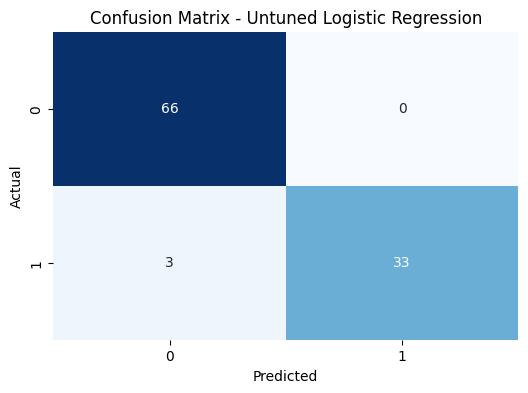


--- Tuned Best Model Report ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.92      0.96        36

    accuracy                           0.97       102
   macro avg       0.98      0.96      0.97       102
weighted avg       0.97      0.97      0.97       102



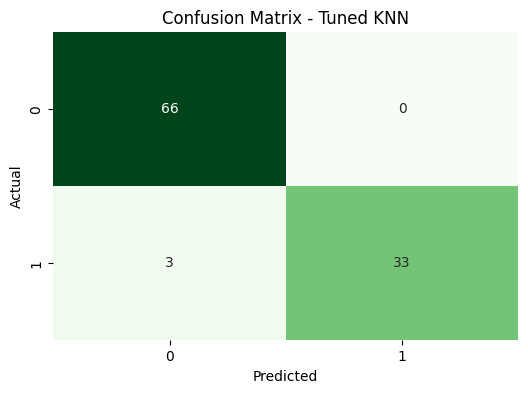

In [27]:
best_untuned_model = results[best_untuned_model_name]['model']
best_tuned_model = tuned_results[best_tuned_model_name]['model']

print("\nUntuned Best Model Report...")
y_pred_untuned = best_untuned_model.predict(X_test)
print(classification_report(y_test, y_pred_untuned))
cm_untuned = confusion_matrix(y_test, y_pred_untuned)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_untuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Untuned {best_untuned_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nTuned Best Model Report...")
y_pred_tuned = best_tuned_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Confusion Matrix - Tuned {best_tuned_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Step 10: Prediction**

In [30]:
sample = X_test.iloc[:5]
true_vals = y_test.iloc[:5]

pred_untuned = best_untuned_model.predict(sample)
pred_tuned = best_tuned_model.predict(sample)

comparison_df = pd.DataFrame({
    'Truth': true_vals.values,
    f'{best_untuned_model_name}_Untuned': pred_untuned,
    f'{best_tuned_model_name}_Tuned': pred_tuned
}, index=true_vals.index)

print(comparison_df)

     Truth  Logistic Regression_Untuned  KNN_Tuned
531      0                            0          0
495      0                            0          0
526      0                            0          0
480      0                            0          0
410      0                            0          0
